In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import sklearn as sk
#from sklearn.datasets import load_sample_image

image = Image.open('/cxldata/skin_disease_1/HAM10000_images_draftv1/orig/ISIC_0024306.jpg') 

data = np.asarray(image)
print(type(data))
print(data.shape)
print(data)
plt.imshow(data[:,:,:])


In [7]:
def end_to_end_data_prep():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    from glob import glob
    from PIL import Image
    %matplotlib inline
    base = '/cxldata/skin_disease_1/'
    metadata = pd.read_csv(os.path.join(base,'HAM10000_metadata_orig.csv'))
    #metadata.info()
    #if we combine data into one directory then no need to mention *
    image_path = {os.path.splitext(os.path.basename(x))[0]: x
                  for x in glob(os.path.join('/cxldata/skin_disease_1/HAM10000_images_draftv1/orig/*.jpg'))}
    metadata['path'] = metadata['image_id'].map(image_path.get)
    #upload data into dataset with resize 254,254
    metadata['image'] = metadata['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
    return metadata

In [2]:
def end_to_end_data_prep_plot(metadata):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    from glob import glob
    from PIL import Image
    %matplotlib inline
    n_samples = 5  # number of samples for plotting
    # Plotting
    fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
    for n_axs, (type_name, type_rows) in zip(m_axs, metadata.sort_values(['dx']).groupby('dx')):
        n_axs[0].set_title(type_name)
        for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
            c_ax.imshow(c_row['image'])
            c_ax.axis('off')

In [3]:
def data_prep_augmentation(path):
    from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
    img = load_img(path, target_size= (224,224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    return x


In [4]:
def data_prep_augmentation_generator(input_image_array,output_dir,output_prefix):
    from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
    
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    i = 0
    for batch in datagen.flow(input_image_array, batch_size=1,save_to_dir=output_dir, save_prefix=output_prefix, save_format='jpg'):
        i += 1
        if i > 10:
            break

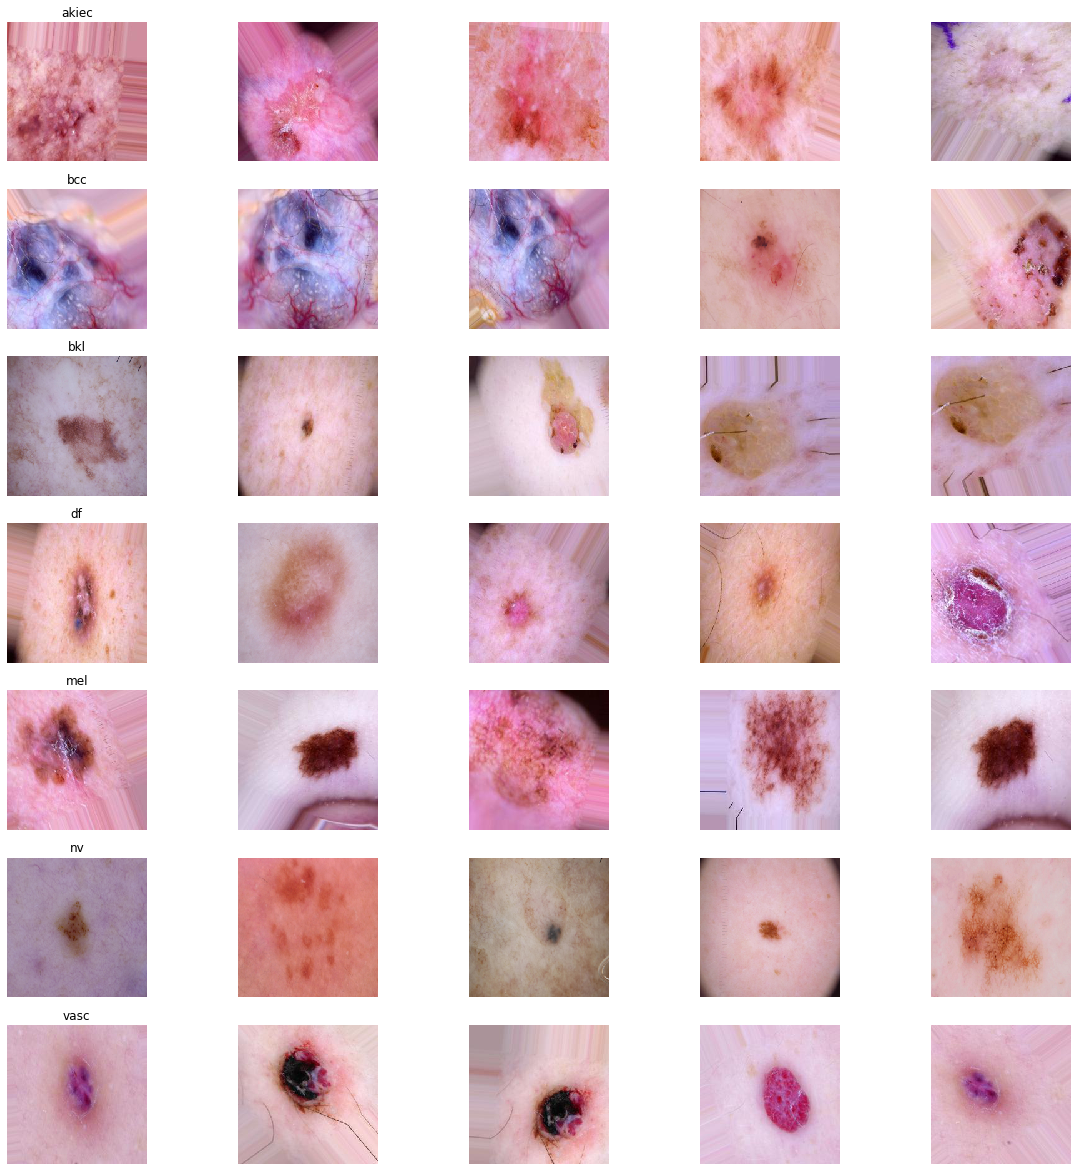

In [5]:
metadata = end_to_end_data_prep()
end_to_end_data_prep_plot(metadata)

In [6]:
input_image_array = data_prep_augmentation(metadata['path'][0])
data_prep_augmentation_generator(input_image_array,'/cxldata/skin_disease_1/testing','bkl')

In [2]:
!ls /cxldata/skin_disease_1/testing

bkl_0_1595.jpg	bkl_0_2841.jpg	bkl_0_3634.jpg	bkl_0_6339.jpg
bkl_0_2738.jpg	bkl_0_3001.jpg	bkl_0_4439.jpg	bkl_0_946.jpg
bkl_0_2747.jpg	bkl_0_3413.jpg	bkl_0_5003.jpg


In [8]:
metadata = end_to_end_data_prep()


In [9]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[187, 150, 192], [190, 154, 195], [192, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[186, 127, 135], [188, 129, 137], [191, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11..."


In [ ]:
def end_to_end_data_prep():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    from glob import glob
    from PIL import Image
    %matplotlib inline
    base = '/cxldata/skin_disease_1/'
    metadata = pd.read_csv(os.path.join(base,'HAM10000_metadata.csv'))
    #metadata.info()
    #if we combine data into one directory then no need to mention *
    image_path = {os.path.splitext(os.path.basename(x))[0]: x
                  for x in glob(os.path.join('/cxldata/skin_disease_1/HAM10000_images_draftv1/','*','*.jpg'))}
    metadata['path'] = metadata['image_id'].map(image_path.get)
    #upload data into dataset with resize 254,254
    metadata['image'] = metadata['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
    return metadata

In [5]:
data = metadata[['image','dx']]

In [44]:
X = data['image']

In [ ]:
metadata.shape

(224, 224, 3)

'bkl'

(224, 224, 3)

In [43]:
#not needed
X = np.asarray(X)
y = np.asarray(y)


In [46]:
print(type(X))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [50]:
#data_tensor = tf.convert_to_tensor(x)

In [56]:
#data_tensor_y = tf.convert_to_tensor(y_1)

In [ ]:
#X = tf.convert_to_tensor(X, dtype=tf.int64)

In [7]:
type(data['image'])

pandas.core.series.Series

In [10]:
X = metadata['image'][0]
y = metadata['dx'][0]

In [13]:
print(type(X))
print(y)

<class 'numpy.ndarray'>
bkl


In [14]:
X.shape

(224, 224, 3)

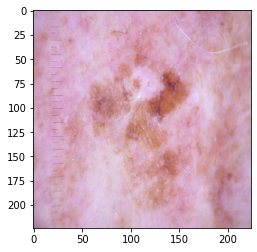

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X)

In [6]:
type(metadata['image'])

pandas.core.series.Series

In [7]:
X[0].shape

(224, 224, 3)

In [28]:
type(X)

numpy.ndarray

In [61]:
metadata['image'][0].shape

(224, 224, 3)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train,test = train_test_split(metadata,test_size=0.2,stratify = metadata['dx'])

#train_class_proportions = get_class_proportions(train)
#test_class_proportions = get_class_proportions(test)


#print("Train_class_proportions",train_class_proportions)
#print("Test_class_proportions",test_class_proportions)


In [10]:
train.shape

(34120, 10)

In [65]:
train

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,image
9357,HAM_0002332,ISIC_0025898,nv,consensus,0.0,male,foot,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[136, 97, 115], [135, 89, 105], [135, 87, 10..."
28120,NaN,df_0_9354,df,histo,NaN,male,lower extremity,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[212, 150, 165], [218, 156, 171], [223, 162,..."
9167,HAM_0002486,ISIC_0028947,nv,histo,35.0,male,abdomen,rosendahl,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[56, 53, 57], [61, 56, 62], [64, 60, 66], [6..."
18864,NaN,bcc_0_3280,bcc,histo,NaN,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[190, 152, 133], [182, 144, 125], [165, 127,..."
40902,NaN,vasc_0_525,vasc,histo,NaN,male,trunk,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[229, 198, 213], [233, 202, 217], [236, 205,..."
...,...,...,...,...,...,...,...,...,...,...
22961,NaN,bkl_0_9940,bkl,histo,NaN,female,chest,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[192, 169, 189], [192, 169, 189], [192, 169,..."
19253,NaN,bcc_0_7921,bcc,histo,NaN,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[195, 138, 179], [196, 139, 180], [196, 139,..."
29550,NaN,df_0_8227,df,histo,NaN,male,lower extremity,vienna_dias,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[205, 154, 123], [204, 153, 122], [202, 151,..."
39753,NaN,vasc_0_1018,vasc,histo,NaN,female,abdomen,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[232, 190, 210], [232, 190, 210], [230, 188,..."


In [91]:
type(train)

pandas.core.frame.DataFrame

In [20]:
test.shape

(8530, 10)

In [ ]:
train.info()

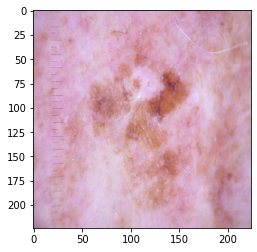

In [75]:
plt.imshow(train['image'][0])

In [38]:
train['image'][0].shape

(224, 224, 3)

In [22]:
train['dx'].value_counts()

nv       5364
mel      5208
df       5025
bkl      5012
vasc     4903
akiec    4485
bcc      4123
Name: dx, dtype: int64

In [23]:
test['dx'].value_counts()

nv       1341
mel      1302
df       1256
bkl      1253
vasc     1226
akiec    1121
bcc      1031
Name: dx, dtype: int64

In [69]:
train.shape

(34120, 10)

In [76]:
train_sk,valid_sk = train_test_split(train,test_size=0.2,stratify = train['dx'])

In [77]:
train_sk.shape

(27296, 10)

In [29]:
valid_sk.shape


(6824, 10)

In [78]:
train_sk['dx'].value_counts()

nv       4291
mel      4166
df       4020
bkl      4010
vasc     3922
akiec    3588
bcc      3299
Name: dx, dtype: int64

In [32]:
valid_sk['dx'].value_counts()

nv       1073
mel      1042
df       1005
bkl      1002
vasc      981
akiec     897
bcc       824
Name: dx, dtype: int64

In [80]:
X_train = train_sk['image']
y_train = train_sk['dx']
X_valid = valid_sk['image']
y_valid = valid_sk['dx']
X_test = test['image']
y_test = test['dx']

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(27296,)
(27296,)
(6824,)
(6824,)
(8530,)
(8530,)


In [92]:
print(type(X_train))
print(type(y_train))
print(type(X_valid))
print(type(y_valid))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


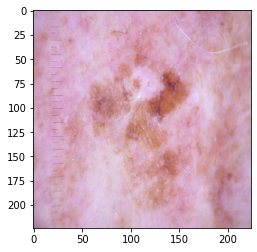

In [81]:
plt.imshow(X_train[0])

(27296,)

In [95]:
X_train.head()

24006    [[[189, 167, 180], [190, 168, 181], [190, 168,...
12453    [[[229, 171, 170], [230, 172, 171], [232, 172,...
30932    [[[238, 222, 207], [238, 222, 207], [238, 222,...
38155    [[[30, 30, 32], [30, 30, 32], [30, 30, 32], [3...
9412     [[[120, 88, 103], [120, 91, 107], [123, 94, 10...
Name: image, dtype: object

In [37]:
X_train[0].shape

(224, 224, 3)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
model = VGG16(weights='imagenet')
print(model.summary())

In [43]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False,input_shape = (224,224,3))
print(model.summary())
for layer in model.layers:
    layer.trainable =False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
import tensorflow as tf
from tensorflow import keras
data_tensor = tf.convert_to_tensor(X)

In [23]:
data_tensor = tf.convert_to_tensor(X, dtype=tf.float64)

In [33]:
type(y)

str

In [37]:
print(X.shape)
print(y)

(224, 224, 3)
bkl


In [40]:
from tensorflow.keras.utils import to_categorical
#data_tensor_y = tf.convert_to_tensor(y)
data_tensor_y = to_categorical(y)

ValueError: invalid literal for int() with base 10: 'bkl'

In [35]:
print(data_tensor_y)

tf.Tensor(b'bkl', shape=(), dtype=string)


In [34]:
print(data_tensor)

tf.Tensor(
[[[187. 150. 192.]
  [190. 154. 195.]
  [192. 156. 198.]
  ...
  [195. 153. 167.]
  [195. 156. 168.]
  [195. 157. 170.]]

 [[188. 151. 193.]
  [191. 155. 196.]
  [194. 156. 199.]
  ...
  [194. 154. 167.]
  [195. 158. 169.]
  [196. 156. 169.]]

 [[189. 150. 192.]
  [192. 152. 193.]
  [193. 153. 194.]
  ...
  [194. 154. 166.]
  [197. 157. 171.]
  [196. 156. 167.]]

 ...

 [[159. 124. 157.]
  [163. 127. 159.]
  [165. 129. 158.]
  ...
  [185. 153. 176.]
  [182. 150. 169.]
  [179. 146. 160.]]

 [[157. 124. 155.]
  [159. 125. 155.]
  [163. 125. 154.]
  ...
  [185. 155. 181.]
  [181. 149. 168.]
  [177. 145. 158.]]

 [[155. 122. 152.]
  [157. 120. 152.]
  [160. 121. 150.]
  ...
  [184. 158. 185.]
  [181. 150. 170.]
  [175. 144. 160.]]], shape=(224, 224, 3), dtype=float64)


In [19]:
import tensorflow as tf
from tensorflow import keras
base_model = keras.applications.vgg16.VGG16(weights="imagenet",
                                                  include_top=False,input_shape = (224,224,3))
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(7, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [20]:
for layer in base_model.layers:
    layer.trainable = False

In [32]:
optimizer = keras.optimizers.SGD(lr=0.2)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(data_tensor,data_tensor_y) #changed from 5

IndexError: list index out of range

In [51]:
X_train.head()

24006    [[[189, 167, 180], [190, 168, 181], [190, 168,...
12453    [[[229, 171, 170], [230, 172, 171], [232, 172,...
30932    [[[238, 222, 207], [238, 222, 207], [238, 222,...
38155    [[[30, 30, 32], [30, 30, 32], [30, 30, 32], [3...
9412     [[[120, 88, 103], [120, 91, 107], [123, 94, 10...
Name: image, dtype: object

In [53]:
import numpy as np
X_train=np.asarray(X_train).astype('float32')


ValueError: setting an array element with a sequence.

In [55]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.int64) 

ValueError: setting an array element with a sequence.

In [58]:
X_train.head()

24006    [[[189, 167, 180], [190, 168, 181], [190, 168,...
12453    [[[229, 171, 170], [230, 172, 171], [232, 172,...
30932    [[[238, 222, 207], [238, 222, 207], [238, 222,...
38155    [[[30, 30, 32], [30, 30, 32], [30, 30, 32], [3...
9412     [[[120, 88, 103], [120, 91, 107], [123, 94, 10...
Name: image, dtype: object

In [61]:
X_train[0]

array([[[187, 150, 192],
        [190, 154, 195],
        [192, 156, 198],
        ...,
        [195, 153, 167],
        [195, 156, 168],
        [195, 157, 170]],

       [[188, 151, 193],
        [191, 155, 196],
        [194, 156, 199],
        ...,
        [194, 154, 167],
        [195, 158, 169],
        [196, 156, 169]],

       [[189, 150, 192],
        [192, 152, 193],
        [193, 153, 194],
        ...,
        [194, 154, 166],
        [197, 157, 171],
        [196, 156, 167]],

       ...,

       [[159, 124, 157],
        [163, 127, 159],
        [165, 129, 158],
        ...,
        [185, 153, 176],
        [182, 150, 169],
        [179, 146, 160]],

       [[157, 124, 155],
        [159, 125, 155],
        [163, 125, 154],
        ...,
        [185, 155, 181],
        [181, 149, 168],
        [177, 145, 158]],

       [[155, 122, 152],
        [157, 120, 152],
        [160, 121, 150],
        ...,
        [184, 158, 185],
        [181, 150, 170],
        [175, 144, 160]]

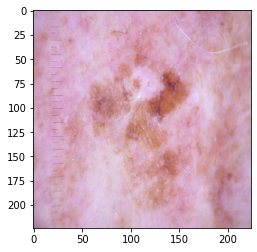

In [62]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [63]:
X_train_sk = X_train.copy()

In [64]:
X_train_sk[0].shape

(224, 224, 3)

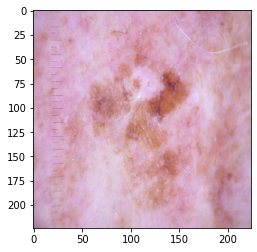

In [65]:
import matplotlib.pyplot as plt
plt.imshow(X_train_sk[0])

In [66]:
X_tf = tf.convert_to_tensor(X_train[0], dtype=tf.int64) 

In [67]:
X_tf

<tf.Tensor: shape=(224, 224, 3), dtype=int64, numpy=
array([[[187, 150, 192],
        [190, 154, 195],
        [192, 156, 198],
        ...,
        [195, 153, 167],
        [195, 156, 168],
        [195, 157, 170]],

       [[188, 151, 193],
        [191, 155, 196],
        [194, 156, 199],
        ...,
        [194, 154, 167],
        [195, 158, 169],
        [196, 156, 169]],

       [[189, 150, 192],
        [192, 152, 193],
        [193, 153, 194],
        ...,
        [194, 154, 166],
        [197, 157, 171],
        [196, 156, 167]],

       ...,

       [[159, 124, 157],
        [163, 127, 159],
        [165, 129, 158],
        ...,
        [185, 153, 176],
        [182, 150, 169],
        [179, 146, 160]],

       [[157, 124, 155],
        [159, 125, 155],
        [163, 125, 154],
        ...,
        [185, 155, 181],
        [181, 149, 168],
        [177, 145, 158]],

       [[155, 122, 152],
        [157, 120, 152],
        [160, 121, 150],
        ...,
        [184, 158, 18

In [68]:
len(X_train)

27296

In [71]:
X_tf_final = []
for i in range(len(X_train)):
    a = []
    a = tf.convert_to_tensor(X_train[i], dtype=tf.int64)
    X_tf_final.append(a[i])

KeyError: 13

In [72]:
type(X_train)

pandas.core.series.Series

In [73]:
tf.constant(X_train)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [74]:
X_train

24006    [[[189, 167, 180], [190, 168, 181], [190, 168,...
12453    [[[229, 171, 170], [230, 172, 171], [232, 172,...
30932    [[[238, 222, 207], [238, 222, 207], [238, 222,...
38155    [[[30, 30, 32], [30, 30, 32], [30, 30, 32], [3...
9412     [[[120, 88, 103], [120, 91, 107], [123, 94, 10...
                               ...                        
22034    [[[201, 176, 180], [201, 176, 180], [200, 175,...
36113    [[[196, 157, 184], [195, 156, 183], [197, 158,...
15611    [[[229, 204, 200], [229, 204, 200], [228, 203,...
1488     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
23542    [[[250, 232, 254], [249, 232, 251], [248, 231,...
Name: image, Length: 27296, dtype: object

In [80]:
import pandas as pd
df = pd.DataFrame(data=X_train.values, columns=['image_array'])

In [81]:
df

,image_array
0,"[[[189, 167, 180], [190, 168, 181], [190, 168,..."
1,"[[[229, 171, 170], [230, 172, 171], [232, 172,..."
2,"[[[238, 222, 207], [238, 222, 207], [238, 222,..."
3,"[[[30, 30, 32], [30, 30, 32], [30, 30, 32], [3..."
4,"[[[120, 88, 103], [120, 91, 107], [123, 94, 10..."
...,...
27291,"[[[201, 176, 180], [201, 176, 180], [200, 175,..."
27292,"[[[196, 157, 184], [195, 156, 183], [197, 158,..."
27293,"[[[229, 204, 200], [229, 204, 200], [228, 203,..."
27294,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [83]:
df['image_array'][0].shape

(224, 224, 3)

In [84]:
df.shape

(27296, 1)

In [86]:
tf.constant((df['image_array']))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [87]:
train_x = np.asarray(df['image_array']).astype(np.float32)

ValueError: setting an array element with a sequence.

In [88]:
train_x = np.asarray(X_train).astype(np.float32)

ValueError: setting an array element with a sequence.

In [89]:
X_train = np.asarray(X_train).astype(np.int)


ValueError: setting an array element with a sequence.

In [98]:
X

,image_array
0,"[[[189, 167, 180], [190, 168, 181], [190, 168,..."
1,"[[[229, 171, 170], [230, 172, 171], [232, 172,..."
2,"[[[238, 222, 207], [238, 222, 207], [238, 222,..."
3,"[[[30, 30, 32], [30, 30, 32], [30, 30, 32], [3..."
4,"[[[120, 88, 103], [120, 91, 107], [123, 94, 10..."
...,...
27291,"[[[201, 176, 180], [201, 176, 180], [200, 175,..."
27292,"[[[196, 157, 184], [195, 156, 183], [197, 158,..."
27293,"[[[229, 204, 200], [229, 204, 200], [228, 203,..."
27294,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [ ]:
X_train.describe()

In [ ]:
X_train